In [ ]:
import pandas as pd
import numpy as np

## 0. Import Data

In [ ]:
df = pd.read_csv('Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    15 non-null     object 
 1   Age        14 non-null     float64
 2   Salary     14 non-null     float64
 3   Purchased  15 non-null     object 
dtypes: float64(2), object(2)
memory usage: 608.0+ bytes


In [ ]:
df

,Country,Age,Salary,Purchased
0,India,34.0,92000.0,Yes
1,Sri lanka,22.0,25000.0,Yes
2,China,31.0,74000.0,Yes
3,Sri lanka,29.0,NaN,No
4,China,55.0,98000.0,Yes
5,India,24.0,30000.0,No
6,Sri lanka,28.0,40000.0,No
7,India,NaN,60000.0,No
8,China,51.0,89000.0,Yes
9,India,44.0,78000.0,Yes


## 1. Data Cleaning

## 1.1 Missing Values Handling

In [ ]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

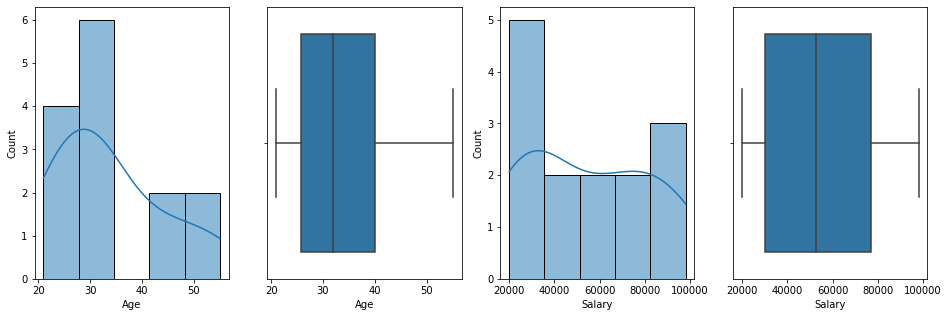

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(16,5))
plt.subplot(141)
sns.histplot(df.Age, kde=True)

plt.subplot(142)
sns.boxplot(df.Age)

plt.subplot(143)
sns.histplot(df.Salary, kde=True)

plt.subplot(144)
sns.boxplot(df.Salary)
plt.show()


In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='median')
df.Age = imp.fit_transform(np.array(df.Age).reshape(-1,1))[:,0]

In [ ]:
imp = SimpleImputer(strategy='mean')
df.Salary = imp.fit_transform(np.array(df.Salary).reshape(-1,1))[:,0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    15 non-null     object 
 1   Age        15 non-null     float64
 2   Salary     15 non-null     float64
 3   Purchased  15 non-null     object 
dtypes: float64(2), object(2)
memory usage: 608.0+ bytes


In [ ]:
df.isnull().sum()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

In [ ]:
# np.array([2,3,4,1,8,9]).reshape(3,-1)

array([[2, 3],
       [4, 1],
       [8, 9]])

## 2. Data Transformation

## 2.1 Aggregation

In [ ]:
df.groupby('Country').mean()

,Age,Salary
Country,,
China,40.500000,72750.000000
India,34.833333,61666.666667
Sri lanka,26.600000,32371.428571


In [ ]:
df.groupby('Country').max()

,Age,Salary,Purchased
Country,,,
China,55.0,98000.000000,Yes
India,44.0,92000.000000,Yes
Sri lanka,33.0,54857.142857,Yes


In [ ]:
df.groupby('Country').min()

,Age,Salary,Purchased
Country,,,
China,25.0,30000.0,Yes
India,24.0,30000.0,No
Sri lanka,21.0,20000.0,No


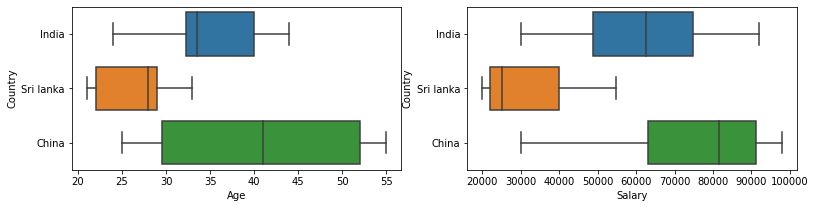

In [ ]:
plt.figure(figsize=(13,3))
plt.subplot(121)
sns.boxplot(data = df, y='Country', x='Age')

plt.subplot(122)
sns.boxplot(data = df, y='Country', x='Salary')
plt.show()

## 2.2 Encoding

In [ ]:
# before encoding
df.head()

,Country,Age,Salary,Purchased
0,India,34.0,92000.000000,Yes
1,Sri lanka,22.0,25000.000000,Yes
2,China,31.0,74000.000000,Yes
3,Sri lanka,29.0,54857.142857,No
4,China,55.0,98000.000000,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder

cat = ['Country', 'Purchased']

for i in cat:
  le = LabelEncoder()
  df[i] = le.fit_transform(df[i])

df

,Country,Age,Salary,Purchased
0,1,34.0,92000.000000,1
1,2,22.0,25000.000000,1
2,0,31.0,74000.000000,1
3,2,29.0,54857.142857,0
4,0,55.0,98000.000000,1
5,1,24.0,30000.000000,0
6,2,28.0,40000.000000,0
7,1,32.0,60000.000000,0
8,0,51.0,89000.000000,1
9,1,44.0,78000.000000,1


## 2.3 Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

ndf = scaler.fit_transform(df)
ndf = pd.DataFrame(ndf, columns=df.columns)
ndf.head()

,Country,Age,Salary,Purchased
0,0.5,0.382353,0.923077,1.0
1,1.0,0.029412,0.064103,1.0
2,0.0,0.294118,0.692308,1.0
3,1.0,0.235294,0.446886,0.0
4,0.0,1.000000,1.000000,1.0


In [ ]:
df.corr()

,Country,Age,Salary,Purchased
Country,1.000000,-0.547839,-0.610219,-0.634811
Age,-0.547839,1.000000,0.815901,0.476991
Salary,-0.610219,0.815901,1.000000,0.534366
Purchased,-0.634811,0.476991,0.534366,1.000000


In [ ]:
ndf.corr()

,Country,Age,Salary,Purchased
Country,1.000000,-0.547839,-0.610219,-0.634811
Age,-0.547839,1.000000,0.815901,0.476991
Salary,-0.610219,0.815901,1.000000,0.534366
Purchased,-0.634811,0.476991,0.534366,1.000000


## 3. Data Integration

In [ ]:
mark = pd.read_csv('Mark.csv')
mark.head()

,student ID,test preparation course,math score,reading score,writing score
0,1,none,72,72,74
1,2,completed,69,90,88
2,3,none,90,95,93
3,4,none,47,57,44
4,5,none,76,78,75


In [ ]:
stud = pd.read_csv('Students.csv')
stud.head()

,student ID,gender,race/ethnicity,parental level of education,lunch
0,1,female,group B,bachelor's degree,standard
1,2,female,group C,some college,standard
2,3,female,group B,master's degree,standard
3,4,male,group A,associate's degree,free/reduced
4,5,male,group C,some college,standard


In [ ]:
merge = stud.merge(mark, on='student ID')
merge.head()

,student ID,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,female,group B,bachelor's degree,standard,none,72,72,74
1,2,female,group C,some college,standard,completed,69,90,88
2,3,female,group B,master's degree,standard,none,90,95,93
3,4,male,group A,associate's degree,free/reduced,none,47,57,44
4,5,male,group C,some college,standard,none,76,78,75


In [ ]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   student ID                   1000 non-null   int64 
 1   gender                       1000 non-null   object
 2   race/ethnicity               1000 non-null   object
 3   parental level of education  1000 non-null   object
 4   lunch                        1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [ ]:
mark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   student ID               1000 non-null   int64 
 1   test preparation course  1000 non-null   object
 2   math score               1000 non-null   int64 
 3   reading score            1000 non-null   int64 
 4   writing score            1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   student ID                   1000 non-null   int64 
 1   gender                       1000 non-null   object
 2   race/ethnicity               1000 non-null   object
 3   parental level of education  1000 non-null   object
 4   lunch                        1000 non-null   object
 5   test preparation course      1000 non-null   object
 6   math score                   1000 non-null   int64 
 7   reading score                1000 non-null   int64 
 8   writing score                1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


## 4. Resampling

In [ ]:
ndf.Purchased.value_counts()

1.0    9
0.0    6
Name: Purchased, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=21)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X_res, y_res = sm.fit_resample(X,y)

In [ ]:
df_res = X_res.copy()
df_res['Purchased'] = y_res

df_res.Purchased.value_counts()

1    9
0    9
Name: Purchased, dtype: int64

In [ ]:
!pip freeze | grep imblearn

imblearn==0.0
